In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats #for QQplot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score #for cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('E:/pythonWorkspace/excelFiles/train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
#replace with age's mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [8]:
#missing value problem solved!

In [9]:
x = df.iloc[:,1:3] #age,fare
y = df.iloc[:,0] #survived
#x and y has extracted

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


let's see, age and Graph wheather it's normally distribuited or not

C:\Users\Admin\AppData\Local\Temp\ipykernel_420\1872560852.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


Text(0.5, 1.0, 'Age QQ Plot')

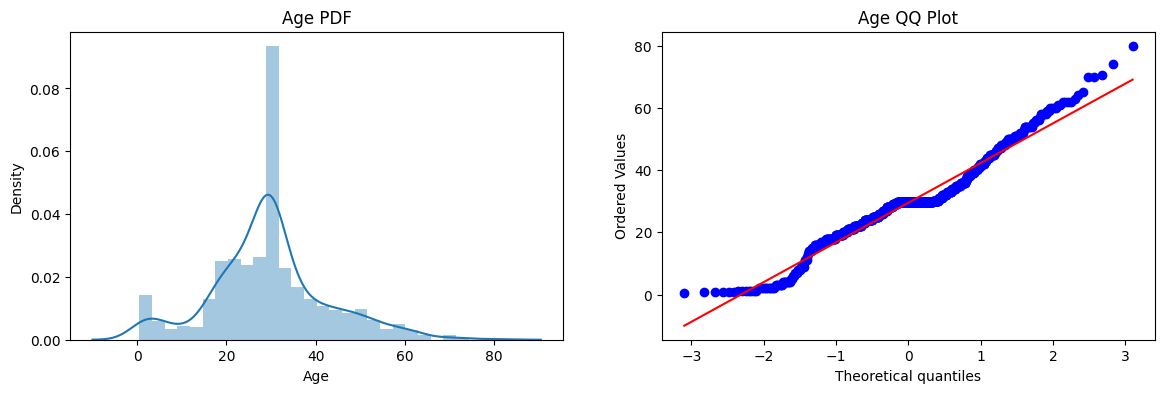

In [11]:
#for Age
#fro Age
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

#This(above) is nearly normally distribuited not exactly!

C:\Users\Admin\AppData\Local\Temp\ipykernel_420\3413414276.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


Text(0.5, 1.0, 'Age QQ plot')

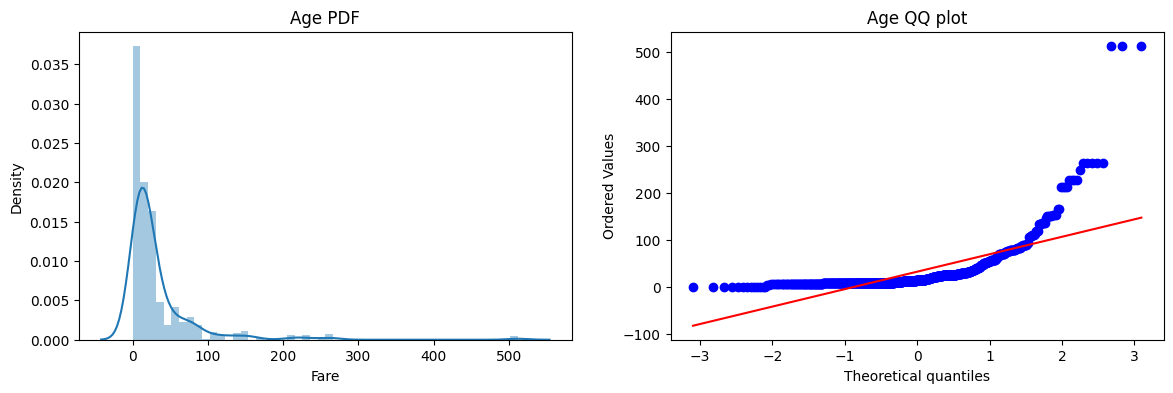

In [12]:
# for fare
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Age QQ plot')

This is not normally distribuited at all, rather it is a rightly skwed!

In [13]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier() #2 obj created!

In [14]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)
    
y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


In [15]:
#what if i apply log transform on both cols

In [16]:
trf =  FunctionTransformer(func=np.log1p)

In [17]:
np.log (simply log krta hai) ager value zero hogi toh gadbad ho jayegi
np.log1p (pahale x me zero add krta hai(x+1)) #so that no value will be zero

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3681207482.py, line 1)

In [18]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [19]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)
    
y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


In [20]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.66


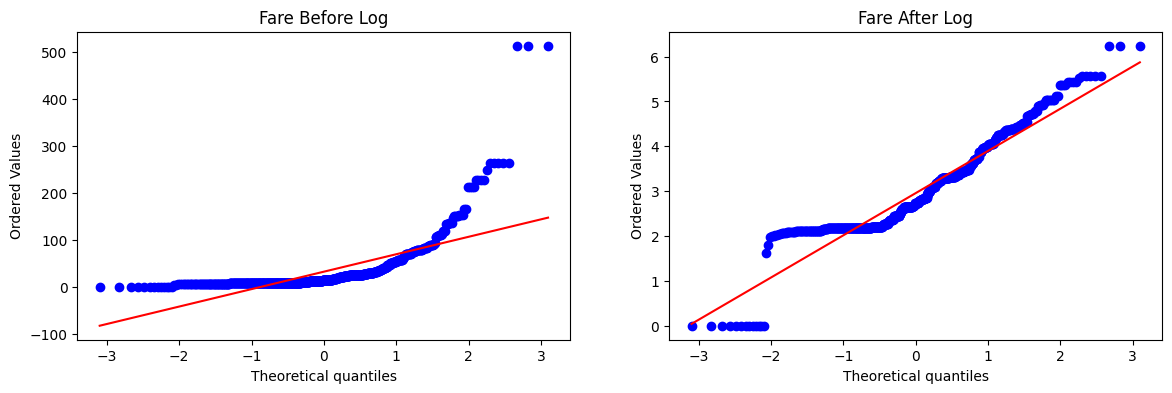

In [21]:
#ha improvement toh hai
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

In [22]:
#see, Fare col which far away than normal distribution, has come so much closer!!!

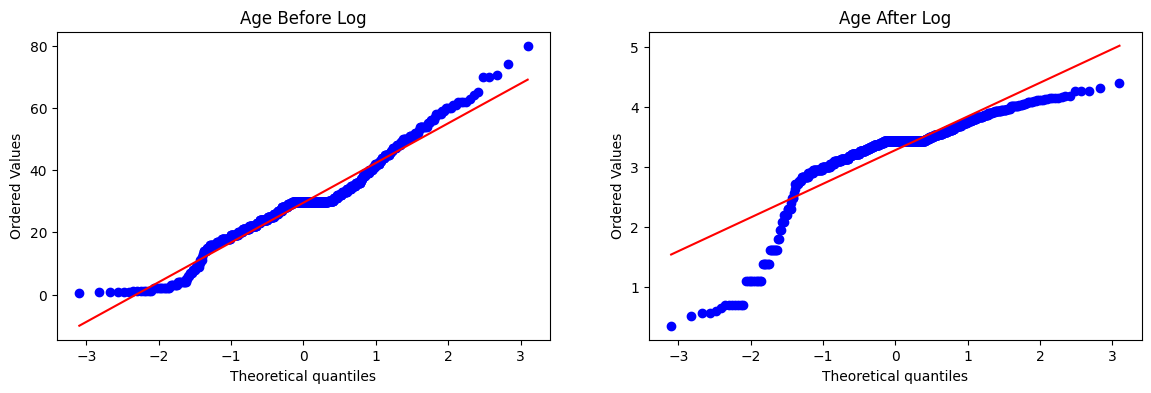

In [23]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [24]:
#one thing realized : pahele achha tha an kharab ho gya

In [27]:
#rather than applying log on fare and age
#let's apply only on fare
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [28]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)
    
y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [30]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6610986267166042


In [31]:

def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


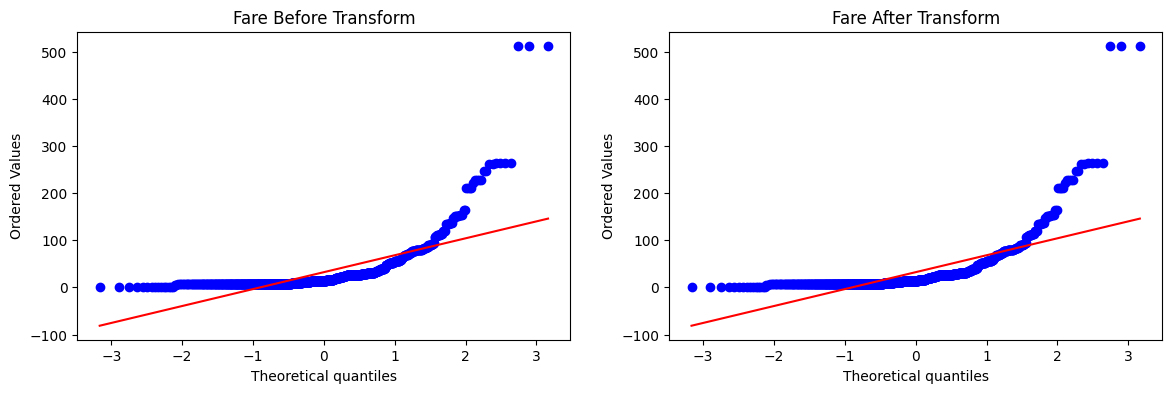

In [33]:
apply_transform(lambda x : x)


Accuracy 0.6442446941323345


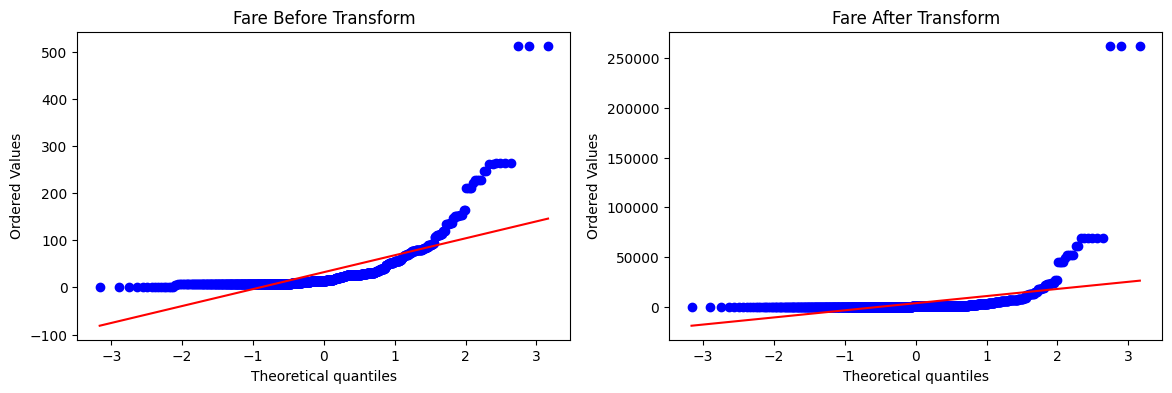

In [34]:
apply_transform(lambda x : x**2) #will return x sqr

Accuracy 0.6589013732833957


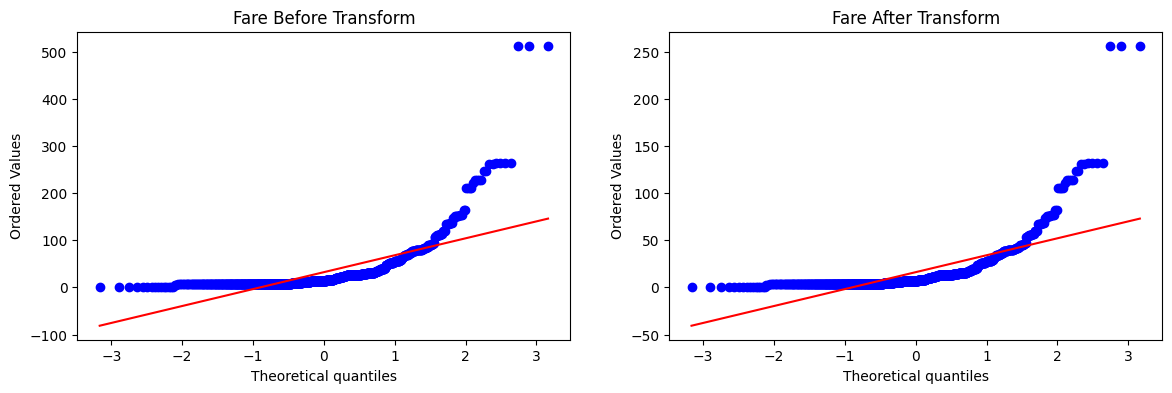

In [35]:
apply_transform(lambda x:x ** 1/2) # applied sqr root

Accuracy 0.61729088639201


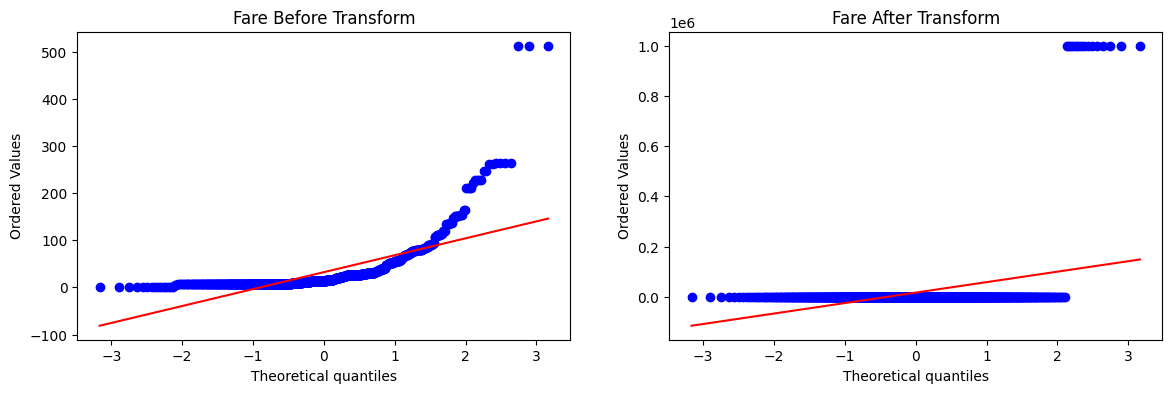

In [38]:
# NOW reciprocal

apply_transform(lambda x:1/(x+0.000001))

Accuracy 0.6195131086142323


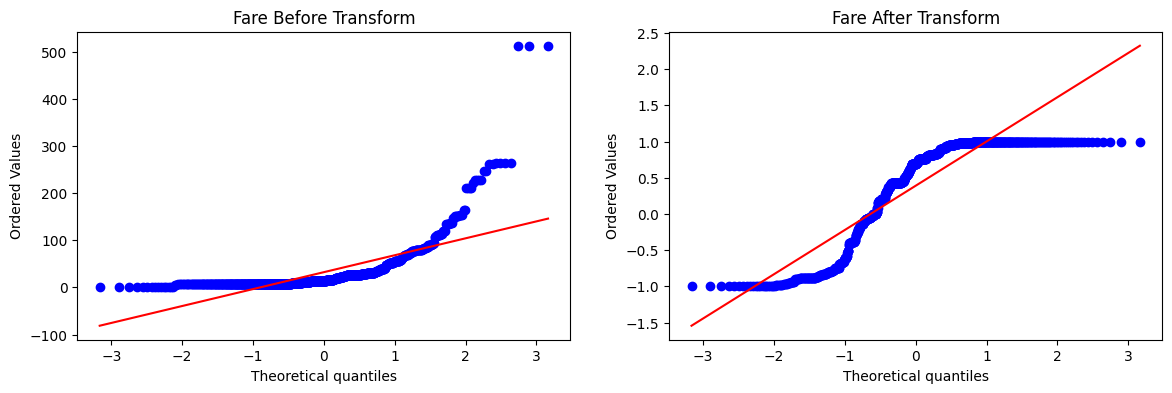

In [39]:
# can do custom also
apply_transform(np.sin)